# How to Use Riveter 💪

This Jupyter notebook will demonstrate how to use the Riveter package to measure social dynamics between personas mentioned in a collection of texts.

The package identifies and extracts the subjects, verbs, and direct objects in texts; it performs coreference resolution on the personas mentioned in the texts (e.g., clustering "Elizabeth Bennet", "Lizzy," and "she" together as one persona); and it measures social dynamics between the personas by referencing a given lexicon. The package currently includes Maarten Sap et al's lexicon for power and agency and Rashkin et al's lexicon for perspective, effect, value, and mental state. 

## Import Libraries

In [6]:
import os
import random
from riveter import Riveter

## Demo with Sap et al's Power and Agency Lexicon

Here are three example stories that we will use to measure power and agency between personas:
> 1. I was just thinking about walking down the street, when my shoelace snapped. I had to call my doctor to pick me up. I felt so bad I also called my friend Katie, who came in her car. She was a lifesaver. My friend Jack is nice.

> 2. My doctor fixed my shoe. I thanked him. Then Susan arrived. Now she is calling the doctor too.

> 3. She went to the store. She thanked the doctor.

In [7]:
example_stories = ["I was just thinking about walking down the street, when my shoelace snapped. I had to call my doctor to pick me up. I felt so bad I also called my friend Katie, who came in her car. She was a lifesaver. My friend Jack is nice.",
                   "My doctor fixed my shoe. I thanked him. Then Susan arrived. Now she is calling the doctor too.",
                   "She went to the store. She thanked the doctor."]
text_ids = [0, 1, 2]

## Load Lexicon ("Power") and Train Model

In [8]:
riveter = Riveter()
riveter.load_sap_lexicon('power')
riveter.train(example_stories,
              text_ids)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 31.86it/s]

2023-02-23 00:09:32 Complete!


## Get Total Scores for All Documents

You can use the `.get_score_totals()` function to get cumulative power scores (or chosen dynamic scores) for each persona mentioned in the texts.

In [9]:
riveter.get_score_totals()

{'i': -0.3333333333333333, 'my doctor': 0.8, 'susan': -0.5, 'the doctor': 1.0}

You can also see what words or names have been clustered together for each persona (performed by the coreference resolution model).

In [39]:
riveter.get_persona_cluster('my doctor')

{'my doctor': 2, 'she': 1, 'him': 1, 'the doctor': 1}

In [34]:
riveter.get_persona_cluster('susan')

{'susan': 1, 'she': 1}

In [35]:
riveter.get_persona_cluster('i')

{'i': 5, 'me': 1}

## Plot Scores for All Documents

You can use the `.plot_scores()` function to display a bar plot with the top *n* or bottom *n* personas in the texts. The function will display the top 10 highest-scoring personas by default.

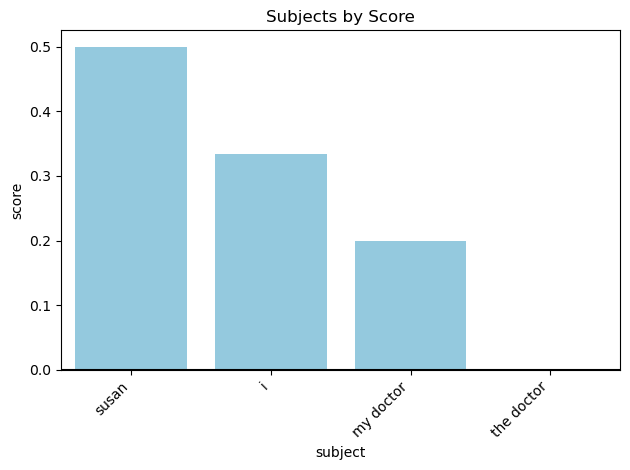

In [36]:
riveter.plot_scores()

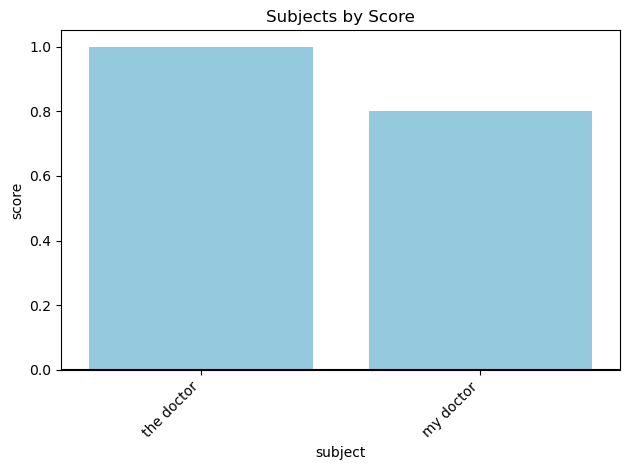

In [12]:
riveter.plot_scores(2)

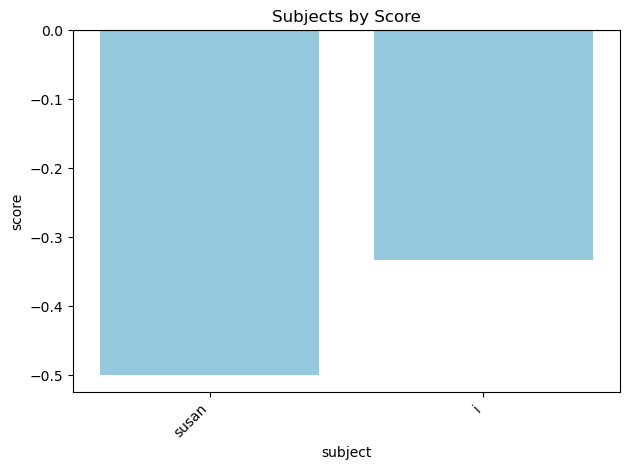

In [13]:
riveter.plot_scores(-2)

## Get Scores, Subjects, and Direct Objects for Each Document

You can use the `.get_score_for_doc()` function to get power scores (or chosen dynamic scores) for each persona mentioned in a document (based on the document id passed into the training function).

In [ ]:
example_stories[0]

'I was just thinking about walking down the street, when my shoelace snapped. I had to call my doctor to pick me up. I felt so bad I also called my friend Katie, who came in her car. She was a lifesaver. My friend Jack is nice.'

In [31]:
riveter.get_scores_for_doc(0)

{'i': 1.0, 'my doctor': 0.0}

You can use `.count_nsubj_for_doc()` to get all noun subjects and verb pairs (regardless of whether the verb apperas in the chosen lexicon) for each document.

In [20]:
riveter.count_nsubj_for_doc(0)

{('i', 'think'): 1,
 ('i', 'have'): 1,
 ('i', 'feel'): 1,
 ('i', 'call'): 1,
 ('my doctor', 'be'): 1}

You can use `.count_dobj_for_doc()` to get all direct objects and verb pairs (regardless of whether the verb apperas in the chosen lexicon) for each document.

In [21]:
riveter.count_dobj_for_doc(0)

{('i', 'pick'): 1, ('my doctor', 'call'): 1}

## Plot Scores for Each Document

You can use the `.plot_scores_for_doc()` function to display a bar plot with the top *n* or bottom *n* personas in a specified document. The function will display the top 10 highest-scoring personas by default.

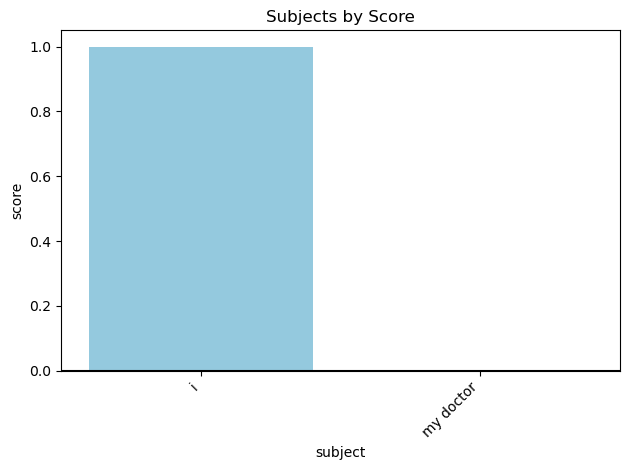

In [32]:
riveter.plot_scores_for_doc(0)

## Regular Expression 

In [ ]:
riveter.train(example_stories,
              text_ids,
              persona_patterns_dict={'first person singular': r'^i$|^me$'})

 67%|█████████████████████████████████████████████████████████████████████▎                                  | 2/3 [00:00<00:00, 16.75it/s]

2023-02-22 23:20:03 Complete!


In [8]:
riveter.get_score_totals()

{'first person singular': -0.16666666666666666}

In [25]:
riveter = Riveter()
riveter.load_sap_lexicon('agency')
riveter.train(example_stories,
              text_ids)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 39.77it/s]

2023-02-23 00:21:35 Complete!


In [26]:
riveter.get_score_totals()

{'i': 0.3333333333333333, 'my doctor': 0.2, 'susan': 0.5, 'the doctor': 0.0}

<br><br><br><br>

# **Small demo w/ Rashkin frames**

In [28]:
example_stories = ["I was just thinking about walking down the street, when my shoelace snapped. I had to call my doctor to pick me up. I felt so bad I also called my friend Katie, who came in her car. She was a lifesaver. My friend Jack is nice.",
                   "My doctor fixed my shoe. I thanked him. Then Susan arrived. Now she is calling the doctor too."]
text_ids = [0, 1]

In [29]:
riveter = Riveter()
riveter.load_rashkin_lexicon('effect')
riveter.train(example_stories,
              text_ids)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 33.66it/s]

2023-02-22 23:20:37 Complete!


In [30]:
riveter.get_score_totals()

{'i': 0.34444444444450006,
 'my doctor': 0.27999999999999997,
 'susan': 0.16666666666649999}

In [31]:
riveter.get_scores_for_doc(0)

{'i': 1.4000000000000001, 'my doctor': 0.266666666667}

In [32]:
riveter.get_scores_for_doc(1)

{'susan': 0.33333333333299997,
 'i': 0.666666666667,
 'my doctor': 1.133333333333}

In [33]:
riveter = Riveter()
riveter.load_rashkin_lexicon('value')
riveter.train(example_stories,
              text_ids)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 32.23it/s]

2023-02-22 23:20:39 Complete!


In [34]:
riveter.get_score_totals()

{'i': 0.6444444444445,
 'my doctor': 0.6400000000002001,
 'susan': 0.5333333333335}

<br><br><br><br>

# **Bigger demo w/ Sap frames and example dataset**

In [8]:
texts = []
text_ids = []
stories_path = '/Users/maria/Documents/data/narrativity/litbank/original'   # Litbank corpus here: https://github.com/dbamman/litbank

j = 0
for _file_name in os.listdir(stories_path):
    _lines = []
    for _line in open(stories_path + '/' + _file_name, 'r'):
        if _line.strip():
            _lines.append(_line.strip())

    # Randomly sample 100 paragraphs from each book
    for _line in random.sample(_lines, 100):        
        texts.append(_line)
        text_ids.append(j)
        j += 1

len(texts), len(text_ids)

(10000, 10000)

In [24]:
riveter = Riveter()
riveter.load_sap_lexicon('power')
riveter.train(texts,
             text_ids)

100%|██████████| 10000/10000 [01:33<00:00, 106.97it/s]

2023-02-22 22:29:49 Complete!


In [25]:
persona_score_dict = riveter.get_score_totals()
len(persona_score_dict)

704

In [26]:
for _persona, _score in sorted(persona_score_dict.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(_score, '\t', _persona)

1.0 	 daredevil
1.0 	 my dear man
1.0 	 dr. morton
1.0 	 dear georgiana
1.0 	 edna
1.0 	 even the kitchen
1.0 	 george, jr.
1.0 	 mrs. grose
1.0 	 esau
1.0 	 the wolfes
1.0 	 i know
1.0 	 old ben
1.0 	 sibyl vane's
1.0 	 poor dreadful mr. isaacs
1.0 	 cassandra
1.0 	 girls
1.0 	 both pedro
1.0 	 auchincloss's query
1.0 	 mr. boldwood
1.0 	 miss millward


In [32]:
# The scores above are skewed by infrequent entities.
# For example, an entity could appear just once in the dataset, and if it has power in that one instance, it will have a score of 1.0.
# We can remove the infrequent entities to clean up the ranked list.
# (Note that this wasn't a great test dataset because most entities don't occur very often; hopefully the NYT data is better!)

persona_count_dict = riveter.get_persona_counts()
persona_score_dict = {p: s for p, s in persona_score_dict.items() if persona_count_dict[p] >= 5}
len(persona_score_dict)

31

In [33]:
for _persona, _score in sorted(persona_score_dict.items(), key=lambda x: x[1], reverse=True):
    print(round(_score, 2), '\t', _persona)

0.33 	 tom
0.3 	 andy
0.27 	 your
0.26 	 mary
0.21 	 dick
0.2 	 the woman
0.2 	 jane
0.2 	 jock
0.19 	 helen
0.17 	 anne
0.15 	 the doctor
0.13 	 you
0.1 	 i
0.1 	 the old man
0.09 	 george
0.08 	 a woman
0.08 	 margaret
0.06 	 "i
0.04 	 myself
0.04 	 a man
0.02 	 the man
0.0 	 man
0.0 	 dale
0.0 	 philip
0.0 	 sir
0.0 	 joe
0.0 	 emma
0.0 	 alice
-0.1 	 woman
-0.11 	 anthony
-0.23 	 frank


In [34]:
riveter.get_persona_cluster('mary')

{'mary': 30, 'she': 4, 'you': 2, 'herself': 1, 'her': 1}

In [35]:
riveter.get_persona_cluster('you')

{'you': 930,
 'i': 37,
 'me': 8,
 'she': 3,
 'he': 2,
 'myself': 1,
 'yours': 1,
 'yourself': 1}

In [36]:
riveter.get_persona_cluster('the man')

{'the man': 42, 'him': 1, 'you': 1, 'i': 3, 'he': 1}

In [10]:
riveter = Riveter()
riveter.load_sap_lexicon('power')
riveter.train(texts,
             text_ids,
             persona_patterns_dict={'masculine pronouns': r'^he$|^him$|^himself$',
                                    'feminine pronouns': r'^she$|^her$|^herself$',
                                    'third person plural pronouns': r'^they$|^them$|^themselves$'})

100%|██████████| 10000/10000 [01:31<00:00, 109.00it/s]

2023-02-22 23:06:03 Complete!


In [11]:
persona_score_dict = riveter.get_score_totals()
len(persona_score_dict)

3

In [13]:
for _persona, _score in sorted(persona_score_dict.items(), key=lambda x: x[1], reverse=True):
    print(round(_score, 3), '\t', _persona)

0.163 	 third person plural pronouns
0.122 	 masculine pronouns
0.117 	 feminine pronouns


In [14]:
riveter.get_persona_cluster('masculine pronouns')

{'he': 1480, 'him': 313, 'himself': 54}

In [15]:
riveter.get_persona_cluster('feminine pronouns')

{'she': 913, 'herself': 34, 'her': 203}

In [16]:
riveter.get_persona_cluster('third person plural pronouns')

{'them': 133, 'they': 400, 'themselves': 19}